<a href="https://colab.research.google.com/github/Abdelrhman129/my-_colab_notbook/blob/main/trafic_Netwark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libearry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
Data=pd.read_csv("combine.csv")

/tmp/ipython-input-1826839373.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Data=pd.read_csv("combine.csv")


In [3]:
np.DataFrame

AttributeError: module 'numpy' has no attribute 'DataFrame'

In [4]:
df = pd.DataFrame(Data)
df.head()



,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
print("Shape:", df.shape)


Shape: (2214469, 79)


In [6]:
print(df.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [18]:

# عدد الصفوف
n_samples = 1000

# بنولّد بيانات عشوائية
np.random.seed(42)

# BENIGN traffic
benign = pd.DataFrame({
    "Flow Duration": np.random.normal(50, 10, n_samples),
    "Total Fwd Packets": np.random.normal(20, 5, n_samples),
    "Total Bwd Packets": np.random.normal(15, 5, n_samples),
    "Packet Size": np.random.normal(200, 50, n_samples),
    "Label": "BENIGN"
})

# ATTACK traffic
attack = pd.DataFrame({
    "Flow Duration": np.random.normal(200, 50, n_samples),
    "Total Fwd Packets": np.random.normal(80, 20, n_samples),
    "Total Bwd Packets": np.random.normal(5, 2, n_samples),
    "Packet Size": np.random.normal(500, 100, n_samples),
    "Label": "ATTACK"
})

# دمج الاثنين
df = pd.concat([benign, attack], ignore_index=True)

print(df.head())
print("Shape:", df.shape)


   Flow Duration  Total Fwd Packets  Total Bwd Packets  Packet Size   Label
0      54.967142          26.996777          11.624109   104.609622  BENIGN
1      48.617357          24.623168          14.277407   156.980749  BENIGN
2      56.476885          20.298152          11.037900   179.319723  BENIGN
3      65.230299          16.765316          13.460192   294.384383  BENIGN
4      47.658466          23.491117           5.531927   227.827656  BENIGN
Shape: (2000, 5)


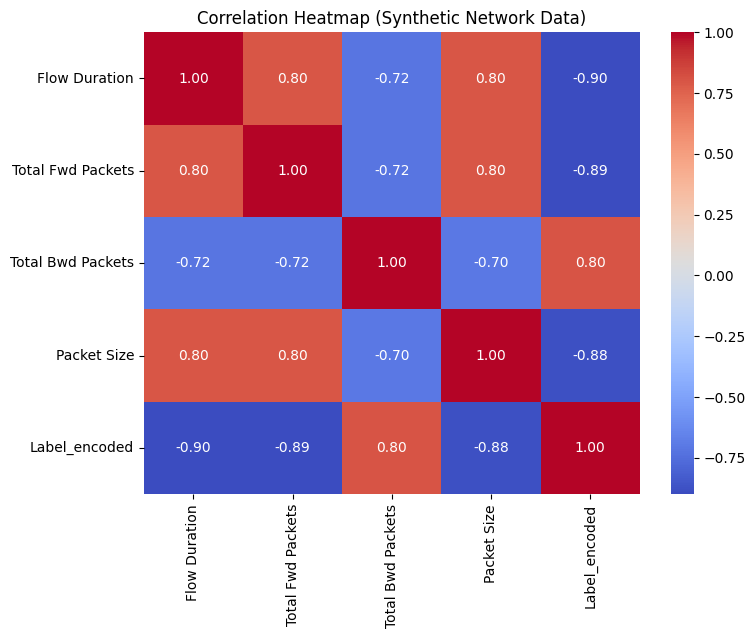

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# نعمل Encoding للـ Label علشان تبقى أرقام (BENIGN=0, ATTACK=1)
df["Label_encoded"] = LabelEncoder().fit_transform(df["Label"])

# نجيب الأعمدة الرقمية بس
numeric_df = df.select_dtypes(include=["int64", "float64"])

# حساب معامل الارتباط
corr = numeric_df.corr()

# رسم Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Synthetic Network Data)")
plt.show()



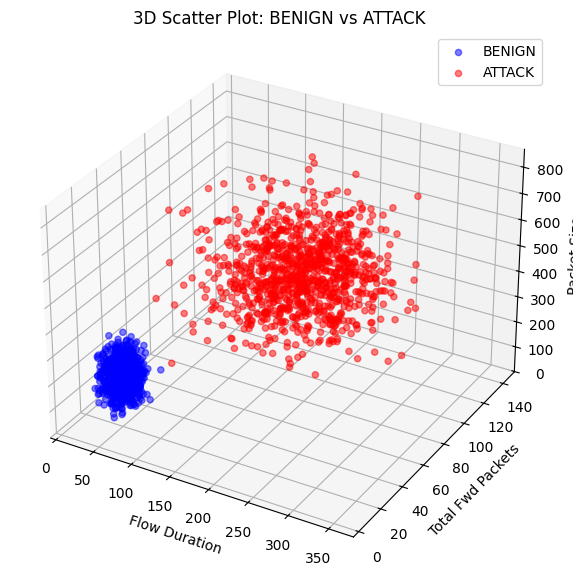

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# نختار 3 features + label
features = ["Flow Duration", "Total Fwd Packets", "Packet Size"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

# نرسم BENIGN
ax.scatter(df.loc[df["Label"]=="BENIGN", features[0]],
           df.loc[df["Label"]=="BENIGN", features[1]],
           df.loc[df["Label"]=="BENIGN", features[2]],
           c="blue", label="BENIGN", alpha=0.5)

# نرسم ATTACK
ax.scatter(df.loc[df["Label"]=="ATTACK", features[0]],
           df.loc[df["Label"]=="ATTACK", features[1]],
           df.loc[df["Label"]=="ATTACK", features[2]],
           c="red", label="ATTACK", alpha=0.5)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("3D Scatter Plot: BENIGN vs ATTACK")
ax.legend()
plt.show()


#مثال على 111:

1 (أول رقم) = عدد الصفوف = 1 صف.

1 (تاني رقم) = عدد الأعمدة = 1 عمود.

1 (تالت رقم) = رقم المكان = أول مكان.

يعني: خليلي الرسمة كلها عبارة عن subplot واحد بس.

Cluster
 0    1001
 1     987
-1      12
Name: count, dtype: int64


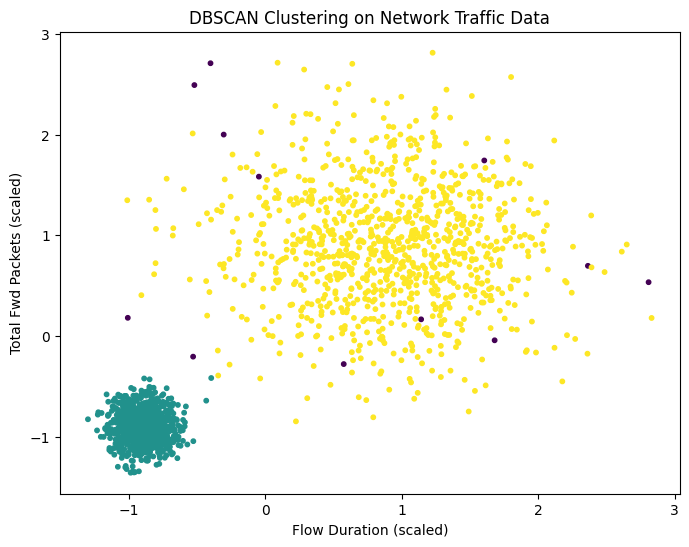

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# نجهز الـ features (من غير الـ Label)
X = df[["Flow Duration", "Total Fwd Packets", "Total Bwd Packets", "Packet Size"]]

# Scaling مهم علشان DBSCAN حساس لحجم القيم
X_scaled = StandardScaler().fit_transform(X)

# نطبق DBSCAN
db = DBSCAN(eps=0.7, min_samples=5).fit(X_scaled)

# نضيف النتائج للـ dataframe
df["Cluster"] = db.labels_

# نعرض عدد النقاط في كل Cluster
print(df["Cluster"].value_counts())

# Visualization (2D Scatter Plot)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df["Cluster"], cmap="viridis", s=10)
plt.title("DBSCAN Clustering on Network Traffic Data")
plt.xlabel("Flow Duration (scaled)")
plt.ylabel("Total Fwd Packets (scaled)")
plt.show()


#eps = 0.7

ده الـ "radius" حوالين كل نقطة.

أي نقط جوه المسافة دي تعتبر جيران لبعض.

لو eps صغير قوي → معظم النقط هتبقى outliers.

لو eps كبير قوي → كل الداتا هتتجمع في Cluster واحد.

min_samples = 5

أقل عدد جيران علشان النقطة تعتبر "Core point" (يعني في قلب Cluster).

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = df["Label_encoded"].values
y_pred = (df["Cluster"] == -1).astype(int)   # -1 = attack (1), باقي = benign (0)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=["BENIGN","ATTACK"]))



[[ 988   12]
 [1000    0]]
              precision    recall  f1-score   support

      BENIGN       0.50      0.99      0.66      1000
      ATTACK       0.00      0.00      0.00      1000

    accuracy                           0.49      2000
   macro avg       0.25      0.49      0.33      2000
weighted avg       0.25      0.49      0.33      2000

